# Aula 5 - Limpeza e transformação de dados

Na aula de hoje, vamos explorar os seguintes tópicos em Python:

- 1) Limpeza de Dados (dropna, fillna, isnull, notnull, replace, duplicated, drop_duplicated)
- 2) Transformação de Dados (cut, qcut, get_dummies)

________

### Objetivos

Apresentar como identificamos valores nulos, discutir melhores formas de tratá-los além de trabalhar com variáveis dummies.

________

### Habilidades a serem desenvolvidas nessa aula

Ao final da aula o aluno deve:

- Saber como identificar valores nulos e como tratá-los.
- Identificar quando utilizar variáveis dummies e como criá-las.
____
____
____

In [33]:
import pandas as pd 
import numpy as np 

In [34]:
df = pd.read_csv("data/titanic.csv")

## Limpeza de Dados: Dados Faltantes

### `.isna() e isnull()`
retorna um df booleano indicando se existe um nulo naquela posição. `pd.isnull()` é um alias para `pd.isna()` dentro do python como podemos ver na <a href="https://github.com/pandas-dev/pandas/blob/0409521665bd436a10aea7e06336066bf07ff057/pandas/core/dtypes/missing.py#L109">documentação</a>. O pandas dataframe é baseado nos df do R, onde null e na tem sentidos distintos.

In [17]:
pd.isnull

<function pandas.core.dtypes.missing.isna(obj)>

In [4]:
df.isna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


Para termos a quantidade de nans em cada coluna podemos somar os valores true:

In [5]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### `.notnull()`

retorna df com True ou False, com True para elementos não nulos

In [6]:
df.notnull().sum()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

### `.dropna()`

elimina nulos em todo o df ou em colunas especificadas. É um dos métodos que aceita o parâmetro `inplace`.


In [7]:
df.dropna(subset=['Age','Embarked'])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [8]:
df.dropna(subset=['Age','Embarked']).isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          529
Embarked         0
dtype: int64

### `.fillna()`

preeche os valores nulos com valores especificados.
Parâmetros úteis:

    method {‘bfill’,‘ffill’, None}, default None
    Preenche os nas propagando o último valor válido para frente (ffill) ou utiliza próxima observação válida para preencher os nulos (bfill).
    axis {0 para ‘index’, 1 para ‘colunas’}
    Eixo no qual se quer preencher os nulos
    inplace {booleano}, default False

Quais soluções poderíamos utilizar para preencher os nulos em Age?
E as cabines nulas?
E os portões de embarque nulos?
Qual os possíveis problemas que podemos encontrar utilizando essas abordagens?


In [9]:
# Podemos ordenar nosso df pelo Pclass e Fare para preencher os nulos de Embarked 
# utilizando o ffill se aceitarmos a premissa de que os portões de embarque eram
# distintos de acordo com o nível social. 
# Qual problema poderíamos estar causando nos nossos dados?
df.sort_values(['Pclass', 'Fare']).fillna(method='ffill')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.00,B94,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,40.0,0,0,112052,0.00,B94,S
806,807,0,1,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.00,A36,S
815,816,0,1,"Fry, Mr. Richard",male,39.0,0,0,112058,0.00,B102,S
822,823,0,1,"Reuchlin, Jonkheer. John George",male,38.0,0,0,19972,0.00,B102,S
...,...,...,...,...,...,...,...,...,...,...,...,...
201,202,0,3,"Sage, Mr. Frederick",male,32.0,8,2,CA. 2343,69.55,F E69,S
324,325,0,3,"Sage, Mr. George John Jr",male,32.0,8,2,CA. 2343,69.55,F E69,S
792,793,0,3,"Sage, Miss. Stella Anna",female,32.0,8,2,CA. 2343,69.55,F E69,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,32.0,8,2,CA. 2343,69.55,F E69,S


### `.interpolate()`
Faz a interpolação dos missing de acordo com o método escolhido.
[Documentação](https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.Series.interpolate.html)

In [14]:
s = pd.DataFrame([0, 1, np.nan, 3, 4, np.nan, 400], columns=['original'])
s['interpolação'] = s.interpolate()
s

,original,interpolação
0,0.0,0.0
1,1.0,1.0
2,NaN,2.0
3,3.0,3.0
4,4.0,4.0
5,NaN,202.0
6,400.0,400.0


### `.replace()`

substitui elementos dentro do df. É um dos métodos que aceita o parâmetro inplace.


In [10]:
# para apenas uma troca
df.replace('male', 'H')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",H,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",H,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",H,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",H,26.0,0,0,111369,30.0000,C148,C


In [24]:
# para mais de uma troca
# df.replace(['male', 'female'], ['H', 'M'])
df.replace({'Sex':{'male':'H', 'female':'M'}})

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",H,22.0,1,0,A/5 21171,7.2500,NaN,Southampton
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",M,38.0,1,0,PC 17599,71.2833,C85,Cherbourg
2,3,1,3,"Heikkinen, Miss. Laina",M,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Southampton
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",M,35.0,1,0,113803,53.1000,C123,Southampton
4,5,0,3,"Allen, Mr. William Henry",H,35.0,0,0,373450,8.0500,NaN,Southampton
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",H,27.0,0,0,211536,13.0000,NaN,Southampton
887,888,1,1,"Graham, Miss. Margaret Edith",M,19.0,0,0,112053,30.0000,B42,Southampton
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",M,NaN,1,2,W./C. 6607,23.4500,NaN,Southampton
889,890,1,1,"Behr, Mr. Karl Howell",H,26.0,0,0,111369,30.0000,C148,Cherbourg


In [18]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

___________________
___________________

**Exercício**: Troque os valores abreviados do portão de embarque para seus respectivos nomes 
(C = Cherbourg; Q = Queenstown; S = Southampton) e preencha os dados faltantes com o portão mais frequente

In [25]:
# Resposta
df.replace({'Embarked': {'C': 'Cherbourg', 'Q':'Queenstown', 'S':'Southampton'}})['Embarked'].fillna('mode')

0      Southampton
1        Cherbourg
2      Southampton
3      Southampton
4      Southampton
          ...     
886    Southampton
887    Southampton
888    Southampton
889      Cherbourg
890     Queenstown
Name: Embarked, Length: 891, dtype: object

___________________
___________________


## Limpeza de Dados: Dados duplicados
### `.duplicated()` e `.drop_duplicated()`

O `.duplicated()` retorna uma series indicando se determinada linha possui duplicados ou não. Já o `.drop_duplicated()`, elimina as linhas duplicadas. <br>
Parâmetros do `.drop_duplicated()`:

   * subset -  seleciona colunas para serem utilizadas na comparação de linhas duplicadas
   * keep - {‘first’, ‘last’, False} (default ‘first’) Determina qual duplicado manter
   * inplace - (default False) Se False retorna uma cópia do df com as alterações, se True faz as modificações no próprio df



In [12]:
# vamos criar um df que possua linhas duplicadas
df_dup = df.copy()

df_dup.loc[891, :] = df_dup.loc[0, :]
                                
df_dup.loc[892, :] = df_dup.loc[1, :]
df_dup.loc[893, :] = df_dup.loc[1, :]

print(df.shape, df_dup.shape)

(891, 12) (894, 12)


In [13]:
df_dup.duplicated().sum()

3

In [14]:
print(df_dup.shape)
print(df_dup.drop_duplicates().shape)

(894, 12)
(891, 12)


_______________________
_______________________
**Exercícios:** Elimine os duplicados considerando as colunas 'brand' e 'style' mantendo o último valor.

In [29]:
df_exerc = pd.DataFrame({
    'brand': ['Yum Yum', 'Yum Yum', 'Yum Yum', 'Indomie', 'Indomie', 'Indomie'],
    'style': ['cup', 'cup', 'cup', 'cup', 'pack', 'pack'],
    'rating': [4, 4, np.nan, 3.5, 15, 5]
})

df_exerc

,brand,style,rating
0,Yum Yum,cup,4.0
1,Yum Yum,cup,4.0
2,Yum Yum,cup,NaN
3,Indomie,cup,3.5
4,Indomie,pack,15.0
5,Indomie,pack,5.0


In [30]:
df_exerc.drop_duplicates(subset=['brand', 'style'], keep='last')

,brand,style,rating
2,Yum Yum,cup,NaN
3,Indomie,cup,3.5
5,Indomie,pack,5.0


__________
__________


## Transformação de dados

### `.cut()`
O método `.cut()` ordena os dados, separa em bins e computa qual grupo cada linha do df pertence. O `.cut()` escolherá os bins para serem espaçados uniformemente de acordo com os próprios valores e não com a frequência desses valores.  <br>
Ele é muito utilizado para transformar variáveis contínuas em categóricas. Por exemplo, podemos converter o valor númerico da idade em grupos de criança, jovem, adulto e idoso.
<br><br>
<a href='https://pandas.pydata.org/docs/reference/api/pandas.cut.html'>Parâmetros:</a> <br>
`pandas.cut(x, bins, right=True, labels=None, retbins=False, precision=3, include_lowest=False, duplicates='raise', ordered=True)`

Ao informar quantidade de grupos o pd.cut() escolhe os bins com o mesmo tamanho de janela :


In [82]:
df['cut_bins'] = pd.cut(df.Age, 4)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,cut_bins,cut_classes
0,0,3,male,22.0,1,0,7.2500,NaN,S,"(20.315, 40.21]",adultos
1,1,1,female,38.0,1,0,71.2833,C85,C,"(20.315, 40.21]",adultos
2,1,3,female,26.0,0,0,7.9250,NaN,S,"(20.315, 40.21]",adultos
3,1,1,female,35.0,1,0,53.1000,C123,S,"(20.315, 40.21]",adultos
4,0,3,male,35.0,0,0,8.0500,NaN,S,"(20.315, 40.21]",adultos


Podemos passar o nome dos grupos e transformar a variável numérica diretamente em categórica


In [78]:
df['cut_classes'] = pd.cut(df.Age, 4, labels=["jovens", "adultos", "meia-idade", "idosos"])
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,cut_bins,cut_classes
0,0,3,male,22.0,1,0,7.2500,NaN,S,"(20.315, 40.21]",adultos
1,1,1,female,38.0,1,0,71.2833,C85,C,"(20.315, 40.21]",adultos
2,1,3,female,26.0,0,0,7.9250,NaN,S,"(20.315, 40.21]",adultos
3,1,1,female,35.0,1,0,53.1000,C123,S,"(20.315, 40.21]",adultos
4,0,3,male,35.0,0,0,8.0500,NaN,S,"(20.315, 40.21]",adultos


In [90]:
df.cut_bins.unique()

[(20.315, 40.21], NaN, (40.21, 60.105], (0.34, 20.315], (60.105, 80.0]]
Categories (4, interval[float64]): [(0.34, 20.315] < (20.315, 40.21] < (40.21, 60.105] < (60.105, 80.0]]

In [86]:
df.cut_classes.value_counts()

adultos       385
jovens        179
meia-idade    128
idosos         22
Name: cut_classes, dtype: int64

In [87]:
df.cut_bins.value_counts()

(20.315, 40.21]    385
(0.34, 20.315]     179
(40.21, 60.105]    128
(60.105, 80.0]      22
Name: cut_bins, dtype: int64

Também podemos passar uma lista com os valores de início e fim dos bins:

In [81]:
pd.cut(df.Age, [0,20,60,80]).unique()

[(20.0, 60.0], NaN, (0.0, 20.0], (60.0, 80.0]]
Categories (3, interval[int64]): [(0, 20] < (20, 60] < (60, 80]]

In [14]:
df.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

Repare que o ú

### `.qcut()`
O `pd.qcut()` é utilizado quando queremos discretizar nossos dados em quantis. Ao informar quantidade de grupos o `pd.qcut()` escolhe os bins tal que tenhamos a mesma quantidade de valores em cada grupo.

#### `.cut()` x `.qcut()`
   * O comando `.cut()` cria **caixas equidistantes**, mas a **frequência** das amostras é **desigual** em cada caixa
   * O comando `.qcut()` cria **caixas de tamanhos desiguais**, mas a **frequência** das amostras é **igual** em cada caixa.

<br>

[Parâmetros](https://pandas.pydata.org/docs/reference/api/pandas.qcut.html)
<br>
`pandas.qcut(x, q, labels=None, retbins=False, precision=3, duplicates='raise')`

In [93]:
pd.cut(df.Age, 4).value_counts()

(20.315, 40.21]    385
(0.34, 20.315]     179
(40.21, 60.105]    128
(60.105, 80.0]      22
Name: Age, dtype: int64

In [31]:
pd.qcut(df.Age, 4).value_counts()

(20.125, 28.0]     183
(0.419, 20.125]    179
(38.0, 80.0]       177
(28.0, 38.0]       175
Name: Age, dtype: int64

In [32]:
pd.qcut(df.Age, 4).value_counts()/df.Age.notnull().sum()

(20.125, 28.0]     0.256303
(0.419, 20.125]    0.250700
(38.0, 80.0]       0.247899
(28.0, 38.0]       0.245098
Name: Age, dtype: float64

<a href='https://towardsdatascience.com/discretisation-using-decision-trees-21910483fa4b'>Discretização utilizando decision trees</a>

### `.get_dummies()`

#### variáveis categóricas
Variáveis categóricas são aquelas que representam grupos ou classes dentro dos nossos dados. Elas podem ser de dois tipos:
* ordinais: possuem uma ordem que tem um sentido. Por exemplo, em rendimentos poderíamos ter: classe alta > classe média > classe baixa  
* nominais: não possuem uma ordem válida. Por exemplo: sexo e CEP.

<img src="variaveis_categoricas.jpeg" style="width: 500px">

Dummies são quaisquer variáveis cujos valores são 1 ou 0 para cada observação. O método `pd.get_dummies()` converte as variáveis categóricas em numéricas separando cada categoria em uma coluna única.
<br>
<br>
<a href="https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html">Parâmetros:</a> <br>
`pandas.get_dummies(data, prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False, dtype=None)`

In [96]:
pd.get_dummies(df, columns=['Sex', 'cut_classes'], drop_first=True)

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Embarked,cut_bins,Sex_male,cut_classes_adultos,cut_classes_meia-idade,cut_classes_idosos
0,0,3,22.0,1,0,7.2500,NaN,S,"(20.315, 40.21]",1,1,0,0
1,1,1,38.0,1,0,71.2833,C85,C,"(20.315, 40.21]",0,1,0,0
2,1,3,26.0,0,0,7.9250,NaN,S,"(20.315, 40.21]",0,1,0,0
3,1,1,35.0,1,0,53.1000,C123,S,"(20.315, 40.21]",0,1,0,0
4,0,3,35.0,0,0,8.0500,NaN,S,"(20.315, 40.21]",1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,NaN,S,"(20.315, 40.21]",1,1,0,0
887,1,1,19.0,0,0,30.0000,B42,S,"(0.34, 20.315]",0,0,0,0
888,0,3,NaN,1,2,23.4500,NaN,S,NaN,0,0,0,0
889,1,1,26.0,0,0,30.0000,C148,C,"(20.315, 40.21]",1,1,0,0


In [100]:
pd.get_dummies(pd.cut(df.Age, 4))

,"(0.34, 20.315]","(20.315, 40.21]","(40.21, 60.105]","(60.105, 80.0]"
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
886,0,1,0,0
887,1,0,0,0
888,0,0,0,0
889,0,1,0,0


## Exercícios

1. Converta os paises do dataframe abaixo para variáveis dummies dropando a primeira coluna e com o prefixo 'Country' no nome das colunas.

In [51]:
ids = [11, 22, 33, 44, 55, 66, 77]
countries = ['Brasil', 'Argentina', 'Peru', 'Bolívia', 'Uruguai']
sales = [42, 53, 37, 45, 20]

df = pd.DataFrame(list(zip(ids, countries, sales)),
                  columns=['Ids', 'Countries', 'Sales'])
df.head()

,Ids,Countries,Sales
0,11,Brasil,42
1,22,Argentina,53
2,33,Peru,37
3,44,Bolívia,45
4,55,Uruguai,20


In [52]:
y = pd.get_dummies(df.Countries, prefix='Country')
print(y.head())

   Country_Argentina  Country_Bolívia  Country_Brasil  Country_Peru  \
0                  0                0               1             0   
1                  1                0               0             0   
2                  0                0               0             1   
3                  0                1               0             0   
4                  0                0               0             0   

   Country_Uruguai  
0                0  
1                0  
2                0  
3                0  
4                1  


In [53]:
# Define the headers since the data does not have any
headers = ["symboling", "normalized_losses", "make", "fuel_type", "aspiration",
           "num_doors", "body_style", "drive_wheels", "engine_location",
           "wheel_base", "length", "width", "height", "curb_weight",
           "engine_type", "num_cylinders", "engine_size", "fuel_system",
           "bore", "stroke", "compression_ratio", "horsepower", "peak_rpm",
           "city_mpg", "highway_mpg", "price"]

# Read in the CSV file and convert "?" to NaN
obj_df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data",
                  header=None, names=headers, na_values="?" )
obj_df.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [54]:
pd.get_dummies(obj_df, columns=["body_style", "drive_wheels"], prefix=["body", "drive"]).head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,engine_location,wheel_base,length,width,...,highway_mpg,price,body_convertible,body_hardtop,body_hatchback,body_sedan,body_wagon,drive_4wd,drive_fwd,drive_rwd
0,3,NaN,alfa-romero,gas,std,two,front,88.6,168.8,64.1,...,27,13495.0,1,0,0,0,0,0,0,1
1,3,NaN,alfa-romero,gas,std,two,front,88.6,168.8,64.1,...,27,16500.0,1,0,0,0,0,0,0,1
2,1,NaN,alfa-romero,gas,std,two,front,94.5,171.2,65.5,...,26,16500.0,0,0,1,0,0,0,0,1
3,2,164.0,audi,gas,std,four,front,99.8,176.6,66.2,...,30,13950.0,0,0,0,1,0,0,1,0
4,2,164.0,audi,gas,std,four,front,99.4,176.6,66.4,...,22,17450.0,0,0,0,1,0,1,0,0


In [ ]:
income

3. Considere os dados do arquivo "german_credit.csv" que contem dados de empréstimos realizados por um banco.<br>
a. Encontre qual a média de empréstimo ("Credit Amount") obtidos considerando o propósito ("Purpose") do empréstimo nas linhas e o sexo ("Sex") nas colunas.

In [31]:
gc = pd.read_csv('data/german_credit.csv')
gc.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


In [218]:
gc.pivot_table(index="Purpose", columns = ['Sex'] , values="Credit amount", aggfunc='mean')

Sex,female,male
Purpose,,
business,3195.421053,4392.525641
car,3369.723404,3922.333333
domestic appliances,1409.833333,1586.166667
education,2134.041667,3390.171429
furniture/equipment,2774.729730,3269.112150
radio/TV,2400.517647,2525.635897
repairs,2126.400000,2905.058824
vacation/others,11653.666667,7061.222222


In [221]:
gc.groupby(['Purpose', 'Sex'])[['Credit amount']].mean()

Credit amount
Purpose             Sex                  
business            female    3195.421053
                    male      4392.525641
car                 female    3369.723404
                    male      3922.333333
domestic appliances female    1409.833333
                    male      1586.166667
education           female    2134.041667
                    male      3390.171429
furniture/equipment female    2774.729730
                    male      3269.112150
radio/TV            female    2400.517647
                    male      2525.635897
repairs             female    2126.400000
                    male      2905.058824
vacation/others     female   11653.666667
                    male      7061.222222

b. Converta as variáveis categóricas em numéricas.

In [226]:
gc.dtypes

Unnamed: 0           int64
Age                  int64
Sex                 object
Job                  int64
Housing             object
Saving accounts     object
Checking account    object
Credit amount        int64
Duration             int64
Purpose             object
dtype: object

In [232]:
gc['Checking account'].unique()

array(['little', 'moderate', nan, 'rich'], dtype=object)

In [234]:
pd.get_dummies(gc, columns=['Saving accounts', 'Sex', 'Checking account', 'Purpose'], drop_first=True)

,Unnamed: 0,Age,Job,Housing,Credit amount,Duration,Saving accounts_moderate,Saving accounts_quite rich,Saving accounts_rich,Sex_male,Checking account_moderate,Checking account_rich,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,0,67,2,own,1169,6,0,0,0,1,0,0,0,0,0,0,1,0,0
1,1,22,2,own,5951,48,0,0,0,0,1,0,0,0,0,0,1,0,0
2,2,49,1,own,2096,12,0,0,0,1,0,0,0,0,1,0,0,0,0
3,3,45,2,free,7882,42,0,0,0,1,0,0,0,0,0,1,0,0,0
4,4,53,2,free,4870,24,0,0,0,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,31,1,own,1736,12,0,0,0,0,0,0,0,0,0,1,0,0,0
996,996,40,3,own,3857,30,0,0,0,1,0,0,1,0,0,0,0,0,0
997,997,38,2,own,804,12,0,0,0,1,0,0,0,0,0,0,1,0,0
998,998,23,2,free,1845,45,0,0,0,1,0,0,0,0,0,0,1,0,0


In [35]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Com o dataset do titanic, crie variáveis dummies para grupos de idades de 0 a 19, 20 a 39, 40 a 59 e 60 a 79. <br>
Exemplo de saída desejada:
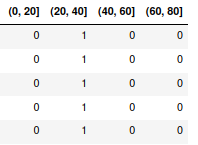

In [47]:
# Resposta
bins = np.arange(0,100,20)

pd.get_dummies(pd.cut(df.Age, bins), drop_first=True)

,"(20, 40]","(40, 60]","(60, 80]"
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
886,1,0,0
887,0,0,0
888,0,0,0
889,1,0,0


## Referências:
pd.melt(): <br>
https://towardsdatascience.com/shape-tables-like-jelly-with-pandas-melt-and-pivot-f2e13e666d6 <br>
https://pub.towardsai.net/understanding-pandas-melt-pd-melt-362954f8c125